In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
matplotlib.rc('font', family="AppleGothic")
matplotlib.rc('axes', unicode_minus=False)

pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.set_option('display.float_format', '{:.2f}'.format)

### 6. 결정 트리

SVM처럼 결정 트리(Decision Tree)도 분류와 회귀 작업 그리고 다중출력 작업도 가능한 다재다능한 머신러닝 알고리즘이고, 매우 복잡한 데이터셋도 학습할 수 있는 강력한 알고리즘이다.

### 6.1 결정 트리 학습과 시각화

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # 꽃잎의 길이와 너비
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [9]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot", #image_path
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [10]:
# $ dot -Tpng iris_tree.dot -o iris_tree.png

SyntaxError: invalid syntax (<ipython-input-10-534e66ef2660>, line 1)

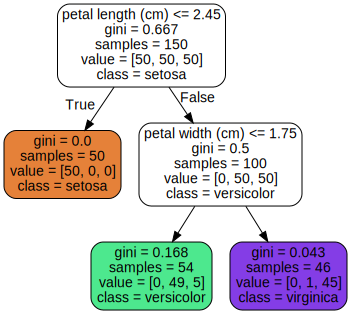

In [17]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file("iris_tree.dot")

### 6.2 예측하기

* 결정 트리의 여러 장점 중 하나는 데이터 전처리가 거의 필요하지 않다는 것입니다. 특히 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않습니다.
* 사이킷런은 **이진 트리**만 만드는 CART 알고리즘을 사용합니다. 그러므로 리프 노드 외의 모든 노드는 자식 노드를 두 개씩 가집니다. 하지만 ID3 같은 알고리즘은 둘 이상의 자식 노드를 가진 결정 트리를 만들 수 있습니다.
* 결정 트리는 매우 직관적이고 결정 방식을 이해하기 쉽습니다. 이런 모델을 **화이트박스(white box)** 모델이라고 합니다.

### 6.3 클래스 확률 추정

In [20]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

높은 확률을 가진 클래스를 출력

In [21]:
tree_clf.predict([[5, 1.5]])

array([1])

### 6.4 CART 훈련 알고리즘

사이킷런은 결정 트리를 훈련시키기 위해 CART(classification And Regression Tree)를 사용한다.
* CART 알고리즘은 **탐욕적 알고리즘(greedy algorithm)** 이다. 맨 위 루트 노드에서 최적의 분할을 찾으며 각 단계에서 이 과정을 반복한다. 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지는 고려하지 않는다. 탐욕적 알고리즘은 종종 납득할만한 훌륭한 솔루션을 만들어내지만 최적의 솔루션을 보장하지는 않는다.

### 6.5 계산 복잡도

훈련 세트가 (수천 개 이하의 샘플 정도로) 작을 경우 사이킷런은 (presort=True로 지정하면) 미리 데이터를 정렬하여 훈련 속도를 높일 수 있다. 하지만 훈련 세트가 클 경우에는 속도가 많이 느려진다.

### 6.6 지니 불순도 또는 엔트로피

기본적으로 지니 불순도가 사용되지만 (*DecisionTreeClassifier의 criterion 매개변수의 기본값은 "gini"이고, DecisionTreeRegressor의 기본값은 "mse") criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용할 수 있다.
* 엔트로피는 모든 메시지가 동일한 때 0이 된다.
* 지니 불순도와 엔트로피 모두 비슷한 트리를 만들어내지만,
* 지니 불순도가 계산이 조금 더 빠르기 때문에 기본값으로 좋다.
* 하지만 다른 트리가 만들어지는 경우 지니 불순도가 가장 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있는 반면 엔트로피는 조금 더 균형 잡힌 트리를 만들어준다.

### 6.7 규제 매개변수

결정 트리는 훈련 데이터에 대한 제약사항이 거의 없습니다(반대로 선형 모델은 데이터가 꼭 선형일 거라 가정합니다). 제한을 두지 않으면 트리가 훈련 데이터에 아주 가깝게 맞추려고 해서 대부분 과대적합되기 쉽습니다. 결정 트리는 모델 파라미터가 전혀 없는 것이 아니라(보통 많습니다) 훈련되기 전에 파라미터 수가 결정되지 않기 때문에 이런 모델을 **비파라미터 모델(nonparametric model)** 이라고 부르곤 합니다. 반대로 선형 모델 같은 파라미터 모델은 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어듭니다(하지만 과소적합될 위험은 커집니다).

훈련 데이터에 대한 과대적합을 피라기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있습니다. 이를 **규제**라고 합니다.
- 사이킷런에서는 max_depth로 이를 조절합니다. max_depth를 줄이면 모델을 규제하고 되고 과대적합의 위험이 감소합니다. (기본값은 제한이 없는 것을 의미하는 None입니다)
- DecisionTreeClassifier에는 비슷하게 결정 트리의 형태를 제한하는 다른 매개변수가 있다.
    - min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_leaf_nodes, max_features
    - min_으로 시작하는 매개변수를 증가시키거나 max_로 시작하는 매개변수를 감소시키면 모델에 규제가 커진다.
- 제한 없이 결정 트리를 훈련시키고 불필요한 노드를 가지치기(pruning)하는 알고리즘도 있다.

### 6.8 회귀

In [22]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

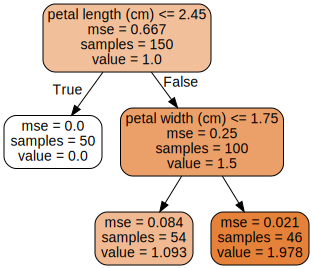

In [24]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file="iris_tree2.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

from graphviz import Source

Source.from_file("iris_tree2.dot")

CART 알고리즘은 훈련 세트를 불순도를 최소화하는 방향으로 분할하는 대신 평균제곱오차(MSE)를 최소화하도록 분할한다.

### 6.9 불안정성

결정 트리는 이해하고 해석하기 쉬우며, 사용하기 편하고, 여러 용도로 사용할 수 있으며, 성능도 뛰어나다. 하지만 몇 가지 제한사항이 있다. 결정 트리는 계단 모양의 결정 경계를 만들기 때문에 훈련 세트의 회전에 민감하다. 이를 해결하기 위해서 훈련 데이터를 더 좋은 방향으로 회전시키는 PCA 기법을 사용한다.

또한 결정 트리는 훈련 데이터에 있는 작은 변화에도 매우 민감하다. 때문에 사이킷런에서 사용하는 훈련 알고리즘은 확률적이기 때문에 같은 훈련 데이터에서도 다른 모델을 얻게 될 수도 있다.(randome_state 매개변수를 지정하지 않을 시)

### 6.10 연습문제